# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Define an empty list to fetch the weather data for each city
city_data = []
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
       
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    try:
        # Create endpoint URL with each city
        city_url = f"{url}q={city}&appid={weather_api_key}"
        # Make the API request
        city_weather = requests.get(city_url)
        
        # Check if the response status code is 200 (OK)
        if city_weather.status_code == 200:
            # Parse the JSON and retrieve data
            city_data_json = city_weather.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_data_json["coord"]["lat"]
            city_lng = city_data_json["coord"]["lon"]
            city_max_temp = city_data_json["main"]["temp_max"]
            city_humidity = city_data_json["main"]["humidity"]
            city_clouds = city_data_json["clouds"]["all"]
            city_wind = city_data_json["wind"]["speed"]
            city_country = city_data_json["sys"]["country"]
            city_date = city_data_json["dt"]

            # Append the City information into city_data list
            city_info = {
                "City": city,
                "Lat": city_lat,
                "Lng": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            }
            city_data.append(city_info)

            # Print a success message for the current city
            print(f"City {city} found. Adding to city_data.")
            
        else:
            # Print a message for cities not found or API errors
            print(f"City {city} not found. Skipping...")
        
    except Exception as e:
        # Handle any exceptions that may occur
        print(f"An error occurred: {e}")
    
    # Add a sleep interval (optional) to avoid overloading the API
   # time.sleep(1)

# Print the end of data retrieval
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | west island
Processing Record 3 of Set 1 | alotau
Processing Record 4 of Set 1 | christchurch
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | zarghun shahr
Processing Record 13 of Set 1 | berdigestyakh
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | bodo
Processing Record 16 of Set 1 | iskateley
Processing Record 17 of Set 1 | kapuskasing
Processing Record 18 of Set 1 | minas de marcona
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | port-aux-francais
Processing Recor

KeyboardInterrupt: 

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()




City          361
Lat           361
Lng           361
Max Temp      361
Humidity      361
Cloudiness    361
Wind Speed    361
Country       361
Date          361
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cabo san lucas,22.8909,-109.9124,308.49,67,0,3.60,MX,1693933761
1,giaginskaya,44.8621,40.0719,294.05,83,81,3.59,RU,1693933762
2,sho'rchi,38.0141,67.7899,298.17,21,0,2.81,UZ,1693933763
3,grytviken,-54.2811,-36.5092,271.23,82,43,4.46,GS,1693933764
4,nyurba,63.2842,118.3319,276.46,93,100,3.91,RU,1693933765


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cabo san lucas,22.8909,-109.9124,308.49,67,0,3.60,MX,1693933761
1,giaginskaya,44.8621,40.0719,294.05,83,81,3.59,RU,1693933762
2,sho'rchi,38.0141,67.7899,298.17,21,0,2.81,UZ,1693933763
3,grytviken,-54.2811,-36.5092,271.23,82,43,4.46,GS,1693933764
4,nyurba,63.2842,118.3319,276.46,93,100,3.91,RU,1693933765


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

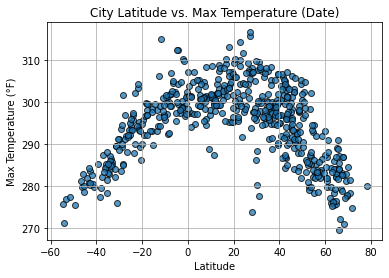

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

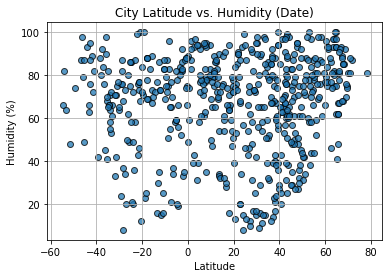

In [17]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

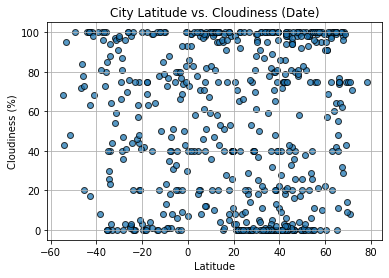

In [18]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

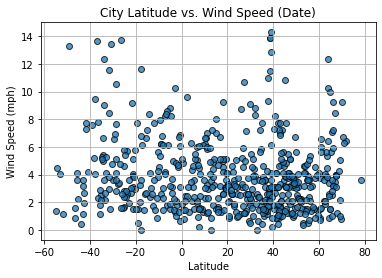

In [19]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, file_name):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create scatter plot
    plt.scatter(x_values, y_values, marker='o', edgecolors='black', alpha=0.75)

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-", label=line_eq)

    # Annotate the equation on the plot
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")

    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Add a legend
    plt.legend()

    # Save the figure
    plt.savefig(file_name)

    # Show the plot
    plt.show()


In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cabo san lucas,22.8909,-109.9124,308.49,67,0,3.60,MX,1693933761
1,giaginskaya,44.8621,40.0719,294.05,83,81,3.59,RU,1693933762
2,sho'rchi,38.0141,67.7899,298.17,21,0,2.81,UZ,1693933763
4,nyurba,63.2842,118.3319,276.46,93,100,3.91,RU,1693933765
5,tsukawaki,33.2667,131.1500,296.32,98,87,0.64,JP,1693933767


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,grytviken,-54.2811,-36.5092,271.23,82,43,4.46,GS,1693933764
6,swan hill,-35.3378,143.5544,278.45,68,0,2.54,AU,1693933768
7,terrigal,-33.4500,151.4500,286.49,53,3,2.18,AU,1693933769
8,port mathurin,-19.6833,63.4167,295.86,71,0,7.75,MU,1693933770
13,gizo,-8.1030,156.8419,299.95,83,88,3.01,SB,1693933776


###  Temperature vs. Latitude Linear Regression Plot

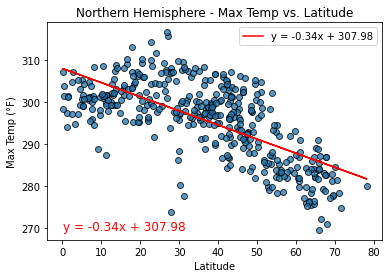

In [23]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Max Temp"],
    "Latitude",
    "Max Temp (°F)",
    "Northern Hemisphere - Max Temp vs. Latitude",
    "output_data/Northern_Hemi_MaxTemp_Lat_LinReg.png"
)


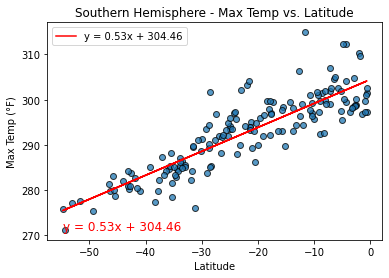

In [24]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Max Temp"],
    "Latitude",
    "Max Temp (°F)",
    "Southern Hemisphere - Max Temp vs. Latitude",
    "output_data/Southern_Hemi_MaxTemp_Lat_LinReg.png"
)


**Discussion about the linear relationship:** these linear regression analyses confirm that latitude affects max temperature in the Northern and Southern Hemispheres. in north hemisphere we have a negative coefficient -0.34 so it implies a cooling effect as we move away from the equator but we have a positive coefficient +0.53 in the southern hemisphere which  suggests a warming trend as we approach the equator.

### Humidity vs. Latitude Linear Regression Plot

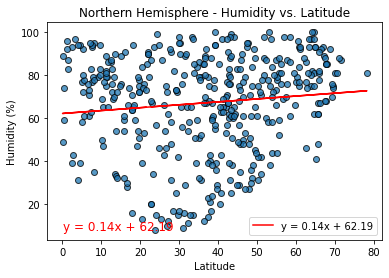

In [26]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Humidity"],
    "Latitude",
    "Humidity (%)",
    "Northern Hemisphere - Humidity vs. Latitude",
    "output_data/Northern_Hemi_Humidity_Lat_LinReg.png"
)
  


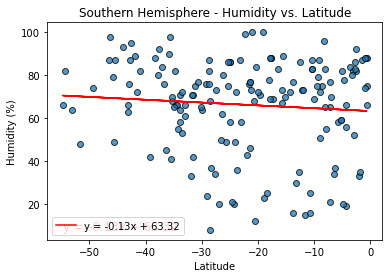

In [27]:
# Southern Hemisphere
# YOUR CODE HERE

plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Humidity"],
    "Latitude",
    "Humidity (%)",
    "Southern Hemisphere - Humidity vs. Latitude",
    "output_data/Southern_Hemi_Humidity_Lat_LinReg.png"
)


**Discussion about the linear relationship:** the linear regression analyses indicate that latitude is not a dominant factor in explaining variations in humidity levels in either hemisphere,The regression coefficient is close to zero, in the both hemisphere .

### Cloudiness vs. Latitude Linear Regression Plot

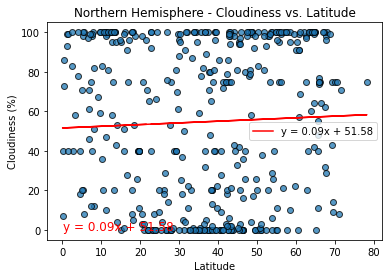

In [28]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness (%)",
    "Northern Hemisphere - Cloudiness vs. Latitude",
    "output_data/Northern_Hemi_Cloudiness_Lat_LinReg.png"
)



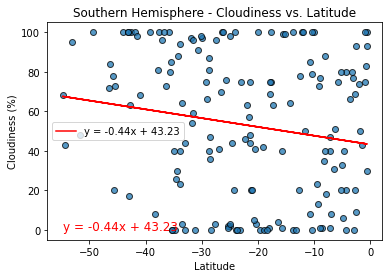

In [29]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness (%)",
    "Southern Hemisphere - Cloudiness vs. Latitude",
    "output_data/Southern_Hemi_Cloudiness_Lat_LinReg.png"
)

**Discussion about the linear relationship:** the linear regression results indicate that cloudiness is not strongly correlated with latitude in either the Northern or Southern Hemisphere but in southern hemisphere little be  correlation  more than in the northern Hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

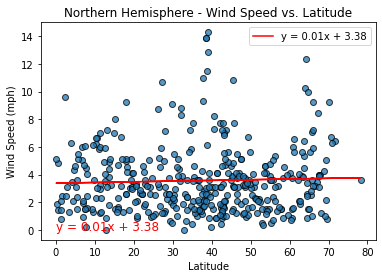

In [30]:
# Northern Hemisphere
# YOUR CODE HERE

plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind Speed (mph)",
    "Northern Hemisphere - Wind Speed vs. Latitude",
    "output_data/Northern_Hemi_WindSpeed_Lat_LinReg.png"
)


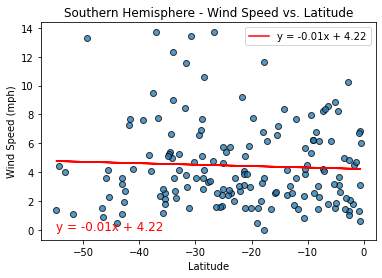

In [31]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind Speed (mph)",
    "Southern Hemisphere - Wind Speed vs. Latitude",
    "output_data/Southern_Hemi_WindSpeed_Lat_LinReg.png"
)

**Discussion about the linear relationship:** the linear regression results show us  that wind speed is not  correlated with latitude in either the Northern or Southern Hemisphere ,the regression coefficient is close to zero, indicating that wind speed levels do not exhibit a clear linear trend with latitude in the Southern Hemisphere, maybe the  Wind is  influenced by others  meteorological and geographical factors .
